### Imports necessary packages

In [1]:
import json
from collections import Counter
from itertools import chain
from pathlib import Path
from IPython.display import display

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Specifies a path to DocRED dataset

In [2]:
docred_dir = Path('../../etc/datasets/docred')

### Implements a utility functions

In [3]:
def display_df(df: pd.DataFrame, desc: str = ""):
    """ Displays given dataframe """

    if desc:
        print(desc)

    df = df.style.set_properties(**{'text-align': 'left'})
    display(df)


def label_distribution(path_to_dataset: Path, label_mapping: dict):
    """ Returns dataframe with labels distribution of given dataset """

    with path_to_dataset.open('r') as file:
        examples = json.load(file)
        
    c = Counter()
        
    for example in examples:
        
        n = len(example['vertexSet'])
        ent_pairs = np.ones((n, n))
        
        for label in example['labels']:
            c[label_mapping[label['r']]] += 1
            ent_pairs[label['h']][label['t']] = 0
            
        c['no_relation'] += np.sum(ent_pairs).astype(int)

    c = c.most_common()

    data = {
        "relations": tuple(map(lambda tmp: tmp[0], c)),
        "count": tuple(map(lambda tmp: tmp[1], c))
    }

    df = pd.DataFrame(data)

    return df


def ner_distribution(path_to_dataset: Path, title: str = ""):
    """ Returns dataframe with entity types distribution of given dataset """

    with path_to_dataset.open('r') as file:
        examples = json.load(file)
    
    c = Counter()
    for example in examples:
        for entity in example['vertexSet']:
            c.update(tuple(map(lambda mention: mention['type'], entity)))

    c = c.most_common()

    data = {
        "ner types": tuple(map(lambda tmp: tmp[0], c)),
        "count": tuple(map(lambda tmp: tmp[1], c))
    }

    df = pd.DataFrame(data)

    plt.title(title)
    plt.bar(tuple(map(lambda tmp: tmp[0], c)), tuple(map(lambda tmp: tmp[1], c)))
    plt.xticks(rotation=90)
    plt.ylabel("Count")
    plt.show()

    return df


def length_distribution(path_to_dataset: Path, title: str = ""):
    """ Returns mean example length and other characteristic of given dataset """

    with path_to_dataset.open('r') as file:
        examples = json.load(file)

    lengths = tuple(map(lambda example: len(tuple(chain.from_iterable(example['sents']))), examples))

    plt.title(title)
    plt.hist(lengths, bins=50)
    plt.xlabel("Length in words")
    plt.ylabel("Count")
    plt.show()

    return lengths


# 1. Labels distribution

In [4]:
with (docred_dir / 'rel_info.json').open('r') as file:
    l_mapping = json.load(file) 

In [5]:
train_labels = label_distribution(docred_dir / "train_annotated.json", l_mapping)
display_df(train_labels.head(10), 'DocRED: Train part')

print(f'The number of no_relation label: {train_labels["count"].iloc[0]}')
print(f'The number of other labels: {np.sum(train_labels["count"].iloc[1:])}')

DocRED: Train part


,relations,count
0,no_relation,1222528
1,country,8921
2,located in the administrative territorial entity,4193
3,country of citizenship,2689
4,contains administrative territorial entity,2004
5,publication date,1142
6,performer,1052
7,date of birth,1044
8,date of death,805
9,has part,632


The number of no_relation label: 1222528
The number of other labels: 38180


In [6]:
train_dist_labels = label_distribution(docred_dir / "train_distant.json", l_mapping)
display_df(train_dist_labels.head(10), 'DocRED: Train distant part')

print(f'The number of no_relation label: {train_dist_labels["count"].iloc[0]}')
print(f'The number of other labels: {np.sum(train_dist_labels["count"].iloc[1:])}')

DocRED: Train distant part


,relations,count
0,no_relation,39749680
1,country,313961
2,located in the administrative territorial entity,143006
3,country of citizenship,126360
4,contains administrative territorial entity,62646
5,publication date,37538
6,country of origin,36029
7,capital,34047
8,date of birth,33998
9,place of birth,31232


The number of no_relation label: 39749680
The number of other labels: 1505638


In [7]:
dev_labels = label_distribution(docred_dir / "dev.json", l_mapping)
display_df(dev_labels.head(10), 'DocRED: Development part')

print(f'The number of no_relation label: {dev_labels["count"].iloc[0]}')
print(f'The number of other labels: {np.sum(dev_labels["count"].iloc[1:])}')

DocRED: Development part


,relations,count
0,no_relation,403630
1,country,2831
2,located in the administrative territorial entity,1250
3,country of citizenship,808
4,contains administrative territorial entity,618
5,publication date,406
6,date of birth,343
7,performer,332
8,date of death,255
9,record label,237


The number of no_relation label: 403630
The number of other labels: 12275


### Conclision 

There is a large disparity of labels in DocRED. The number of no_relation label is 30 times more than number of other labels.

# 2. Length of examples

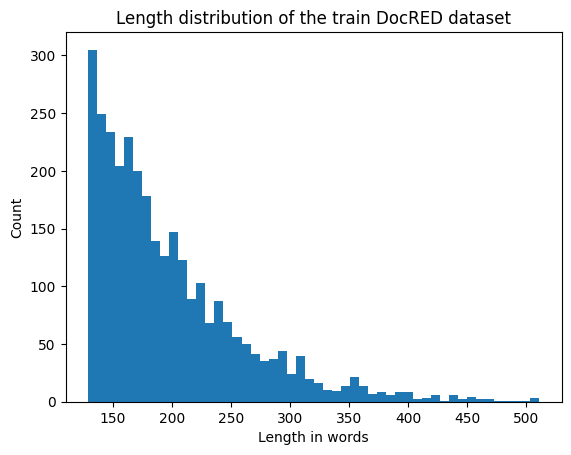

Mean length is 197.66
Std is 62.71


In [8]:
train_lengths = length_distribution(docred_dir / "train_annotated.json", "Length distribution of the train DocRED dataset")
print(f'Mean length is {np.mean(train_lengths):.2f}')
print(f'Std is {np.std(train_lengths):.2f}')

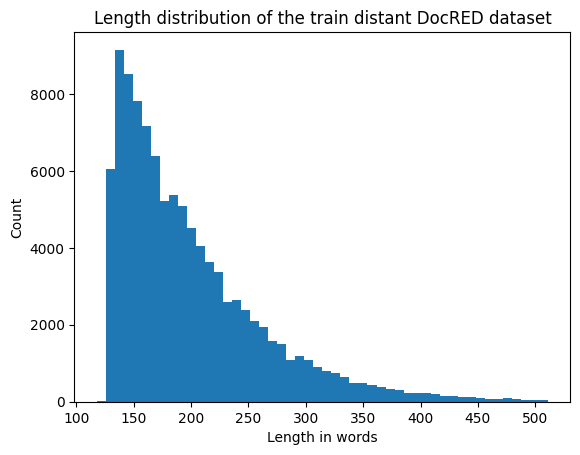

Mean length is 199.55
Std is 64.27


In [9]:
train_dist_lengths = length_distribution(docred_dir / "train_distant.json", "Length distribution of the train distant DocRED dataset")
print(f'Mean length is {np.mean(train_dist_lengths):.2f}')
print(f'Std is {np.std(train_dist_lengths):.2f}')

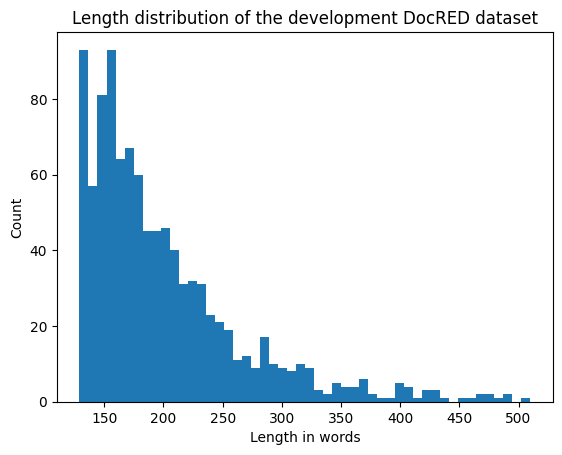

Mean length is 200.48
Std is 67.04


In [10]:
dev_lengths = length_distribution(docred_dir / "dev.json", "Length distribution of the development DocRED dataset")
print(f'Mean length is {np.mean(dev_lengths):.2f}')
print(f'Std is {np.std(dev_lengths):.2f}')

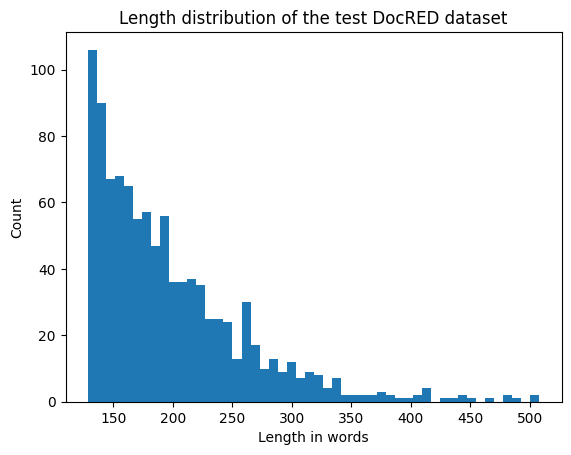

Mean length is 197.79
Std is 63.32


In [11]:
test_lengths = length_distribution(docred_dir / "test.json", "Length distribution of the test DocRED dataset")
print(f'Mean length is {np.mean(test_lengths):.2f}')
print(f'Std is {np.std(test_lengths):.2f}')

### Conclusion:

All parts of DocRED dataset have the same length distribution of their examples.

# Entity types distribution

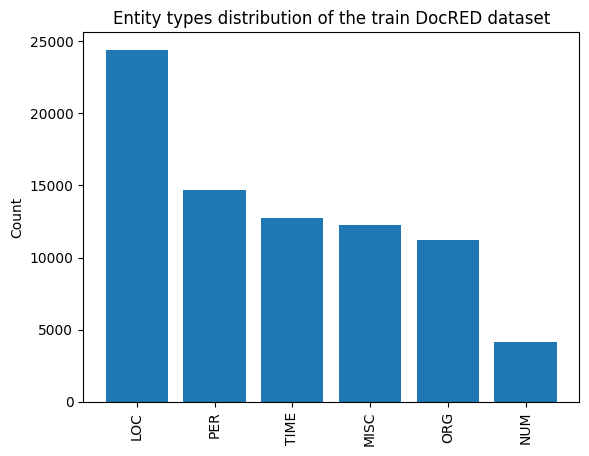

DocRED: Train part


,ner types,count
0,LOC,24400
1,PER,14676
2,TIME,12748
3,MISC,12267
4,ORG,11241
5,NUM,4149


In [12]:
train_ner = ner_distribution(docred_dir / "train_annotated.json", "Entity types distribution of the train DocRED dataset")
display_df(train_ner.head(10), 'DocRED: Train part')

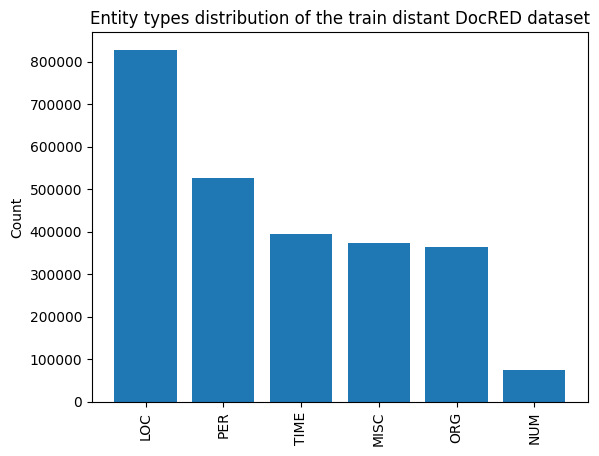

DocRED: Train distant part


,ner types,count
0,LOC,827652
1,PER,525804
2,TIME,394068
3,MISC,372246
4,ORG,363187
5,NUM,75393


In [13]:
train_dist_ner = ner_distribution(docred_dir / "train_distant.json", "Entity types distribution of the train distant DocRED dataset")
display_df(train_dist_ner.head(10), 'DocRED: Train distant part')

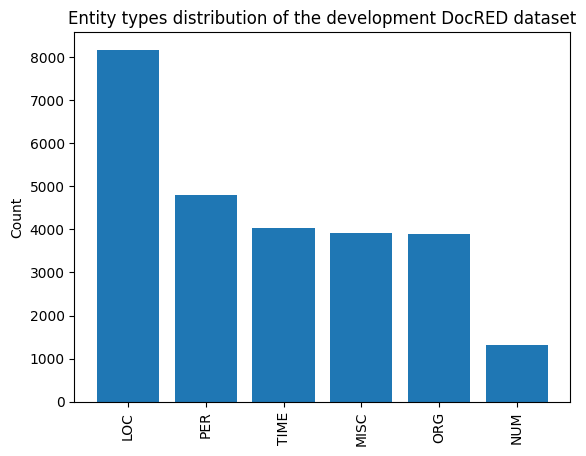

DocRED: Development part


,ner types,count
0,LOC,8168
1,PER,4797
2,TIME,4044
3,MISC,3913
4,ORG,3900
5,NUM,1319


In [14]:
dev_ner = ner_distribution(docred_dir / "dev.json", "Entity types distribution of the development DocRED dataset")
display_df(dev_ner.head(10), 'DocRED: Development part')

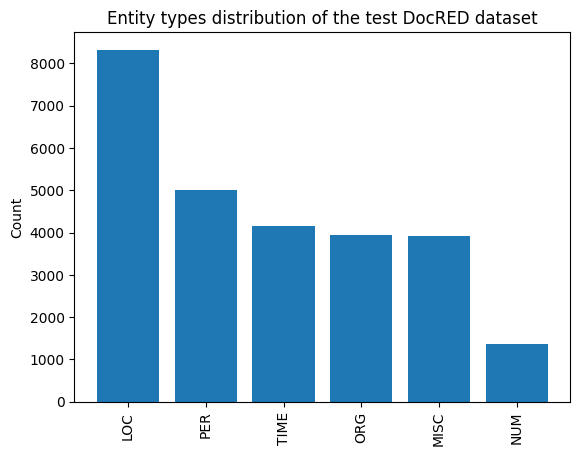

DocRED: Test part


,ner types,count
0,LOC,8320
1,PER,4995
2,TIME,4156
3,ORG,3950
4,MISC,3921
5,NUM,1362


In [15]:
test_ner = ner_distribution(docred_dir / "test.json", "Entity types distribution of the test DocRED dataset")
display_df(test_ner.head(10), 'DocRED: Test part')

### Conclusion

All parts of DocRED dataset have almost the same entity types distribution.